In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(42)
data = {
    'ID': range(1, 11),
    'Age': [25, 30, 22, np.nan, 40, 50, 29, 23, 30, 35],
    'Height_cm': [175, 180, np.nan, 165, 170, 160, 155, 165, 170, 175],
    'Weight_kg': [70, 80, 60, 55, 85, 90, 65, np.nan, 75, 85],
    'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Score': [85, 90, 75, 60, 95, 100, 80, 65, 70, 85]
}

df = pd.DataFrame(data)
df


,ID,Age,Height_cm,Weight_kg,Gender,Score
0,1,25.0,175.0,70.0,M,85
1,2,30.0,180.0,80.0,F,90
2,3,22.0,NaN,60.0,F,75
3,4,NaN,165.0,55.0,M,60
4,5,40.0,170.0,85.0,M,95
5,6,50.0,160.0,90.0,F,100
6,7,29.0,155.0,65.0,M,80
7,8,23.0,165.0,NaN,F,65
8,9,30.0,170.0,75.0,M,70
9,10,35.0,175.0,85.0,F,85


# Data Validity Checks
## Check for missing values

In [27]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 ID           0
Age          1
Height_cm    1
Weight_kg    1
Gender       0
Score        0
dtype: int64


## Check Data Types

In [28]:
# Check data types
data_types = df.dtypes
print("\nData Types:\n", data_types)



Data Types:
 ID             int64
Age          float64
Height_cm    float64
Weight_kg    float64
Gender        object
Score          int64
dtype: object


## Check for Valid Ranges and Values

In [42]:
# Define valid ranges and values
valid_ranges = {
    'Age': (0, 120),
    'Height_cm': (50, 175),
    'Weight_kg': (20, 200),
    'Score': (0, 100)
}

valid_values = {
    'Gender': ['M', 'F']
}

# Function to check ranges
def check_ranges(df, valid_ranges):
    for column, (min_val, max_val) in valid_ranges.items():
        if column in df.columns:
            out_of_range = df[(df[column] < min_val) | (df[column] > max_val)]
            print(f"\nOut of range values in {column}:\n", out_of_range)

# Function to check valid values
def check_valid_values(df, valid_values):
    for column, valid_vals in valid_values.items():
        if column in df.columns:
            invalid_values = df[~df[column].isin(valid_vals)]
            print(f"\nInvalid values in {column}:\n", invalid_values)

# Perform checks
check_ranges(df, valid_ranges)
check_valid_values(df, valid_values)



Out of range values in Age:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Out of range values in Height_cm:
    ID   Age  Height_cm  Weight_kg Gender  Score
1   2  30.0      180.0       80.0      F     90

Out of range values in Weight_kg:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Out of range values in Score:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Invalid values in Gender:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []


## Check for Consistency

In [30]:
# Check for consistency in height and weight
inconsistent_height_weight = df[(df['Height_cm'] <= 0) | (df['Weight_kg'] <= 0)]
print("\nInconsistent Height and Weight:\n", inconsistent_height_weight)



Inconsistent Height and Weight:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []


## Summary

In [31]:
# Summary of data validity
def data_validity_summary(df, valid_ranges, valid_values):
    print("Data Validity Summary:")
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nData Types:\n", df.dtypes)
    check_ranges(df, valid_ranges)
    check_valid_values(df, valid_values)
    inconsistent_height_weight = df[(df['Height_cm'] <= 0) | (df['Weight_kg'] <= 0)]
    print("\nInconsistent Height and Weight:\n", inconsistent_height_weight)

data_validity_summary(df, valid_ranges, valid_values)


Data Validity Summary:

Missing Values:
 ID           0
Age          1
Height_cm    1
Weight_kg    1
Gender       0
Score        0
dtype: int64

Data Types:
 ID             int64
Age          float64
Height_cm    float64
Weight_kg    float64
Gender        object
Score          int64
dtype: object

Out of range values in Age:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Out of range values in Height_cm:
    ID   Age  Height_cm  Weight_kg Gender  Score
1   2  30.0      180.0       80.0      F     90

Out of range values in Weight_kg:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Out of range values in Score:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Invalid values in Gender:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Inconsistent Height and Weight:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []


# Example fixes

In [32]:
# Fill missing values with mean for simplicity (or use other imputation methods)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Height_cm'].fillna(df['Height_cm'].mean(), inplace=True)
df['Weight_kg'].fillna(df['Weight_kg'].mean(), inplace=True)

# Ensure data types are correct
df['ID'] = df['ID'].astype(int)
df['Age'] = df['Age'].astype(float)
df['Height_cm'] = df['Height_cm'].astype(float)
df['Weight_kg'] = df['Weight_kg'].astype(float)
df['Score'] = df['Score'].astype(int)

# Remove out-of-range values or correct them
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]
df = df[(df['Height_cm'] >= 50) & (df['Height_cm'] <= 250)]
df = df[(df['Weight_kg'] >= 20) & (df['Weight_kg'] <= 200)]

# Check for valid values and remove invalid entries
df = df[df['Gender'].isin(valid_values['Gender'])]

# Summary after cleaning
data_validity_summary(df, valid_ranges, valid_values)


Data Validity Summary:

Missing Values:
 ID           0
Age          0
Height_cm    0
Weight_kg    0
Gender       0
Score        0
dtype: int64

Data Types:
 ID             int64
Age          float64
Height_cm    float64
Weight_kg    float64
Gender        object
Score          int64
dtype: object

Out of range values in Age:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Out of range values in Height_cm:
    ID   Age  Height_cm  Weight_kg Gender  Score
1   2  30.0      180.0       80.0      F     90

Out of range values in Weight_kg:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Out of range values in Score:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Invalid values in Gender:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []

Inconsistent Height and Weight:
 Empty DataFrame
Columns: [ID, Age, Height_cm, Weight_kg, Gender, Score]
Index: []


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")


## Visualizing data distributions

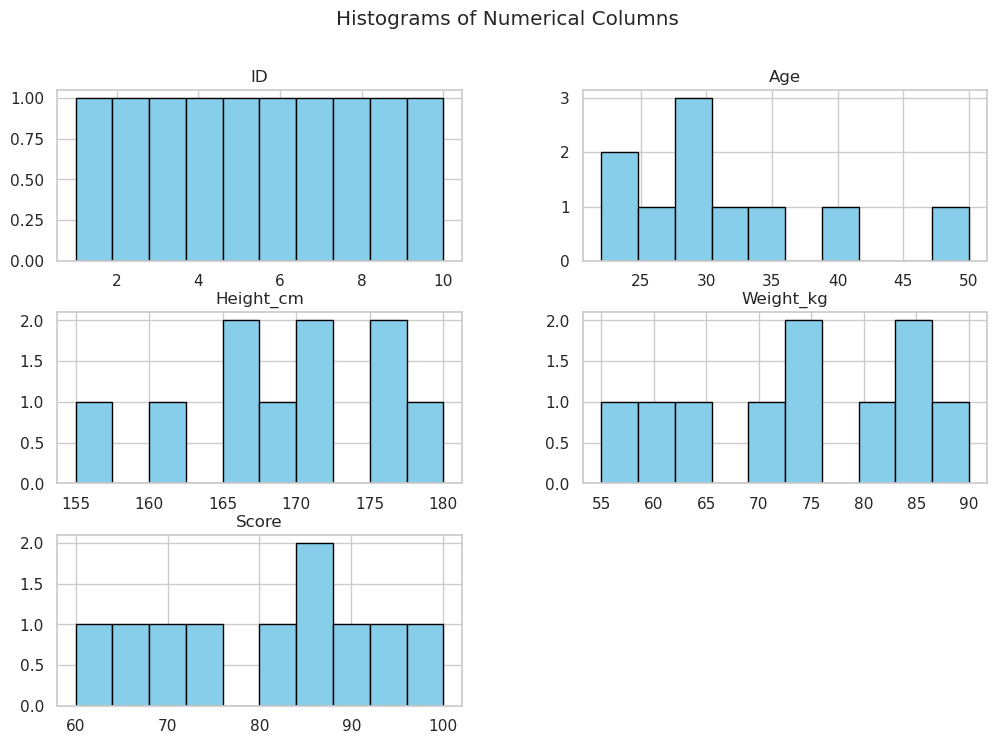

ValueError: num must be an integer with 1 <= num <= 4, not 5

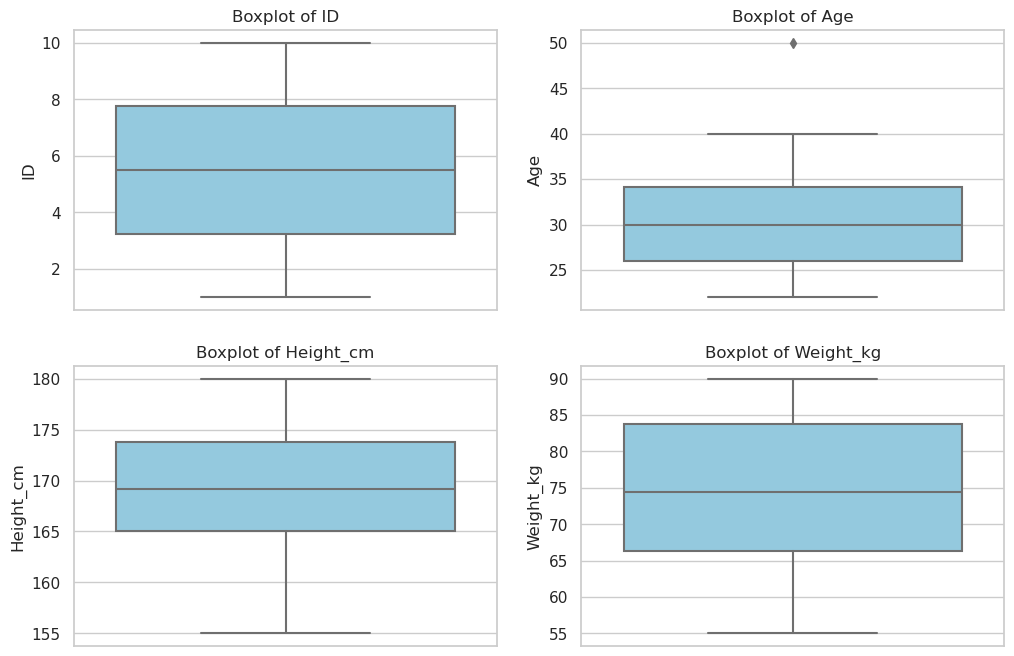

In [34]:
# Plotting histograms for numerical columns
df.hist(figsize=(12, 8), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# Plotting boxplots for numerical columns
plt.figure(figsize=(12, 8))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


## Categorical Data

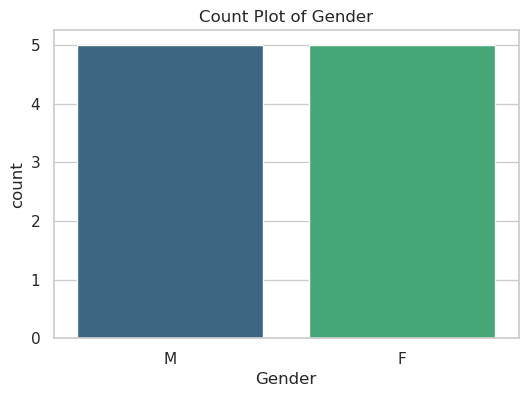

In [24]:
# Count plot for categorical data
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title("Count Plot of Gender")
plt.show()


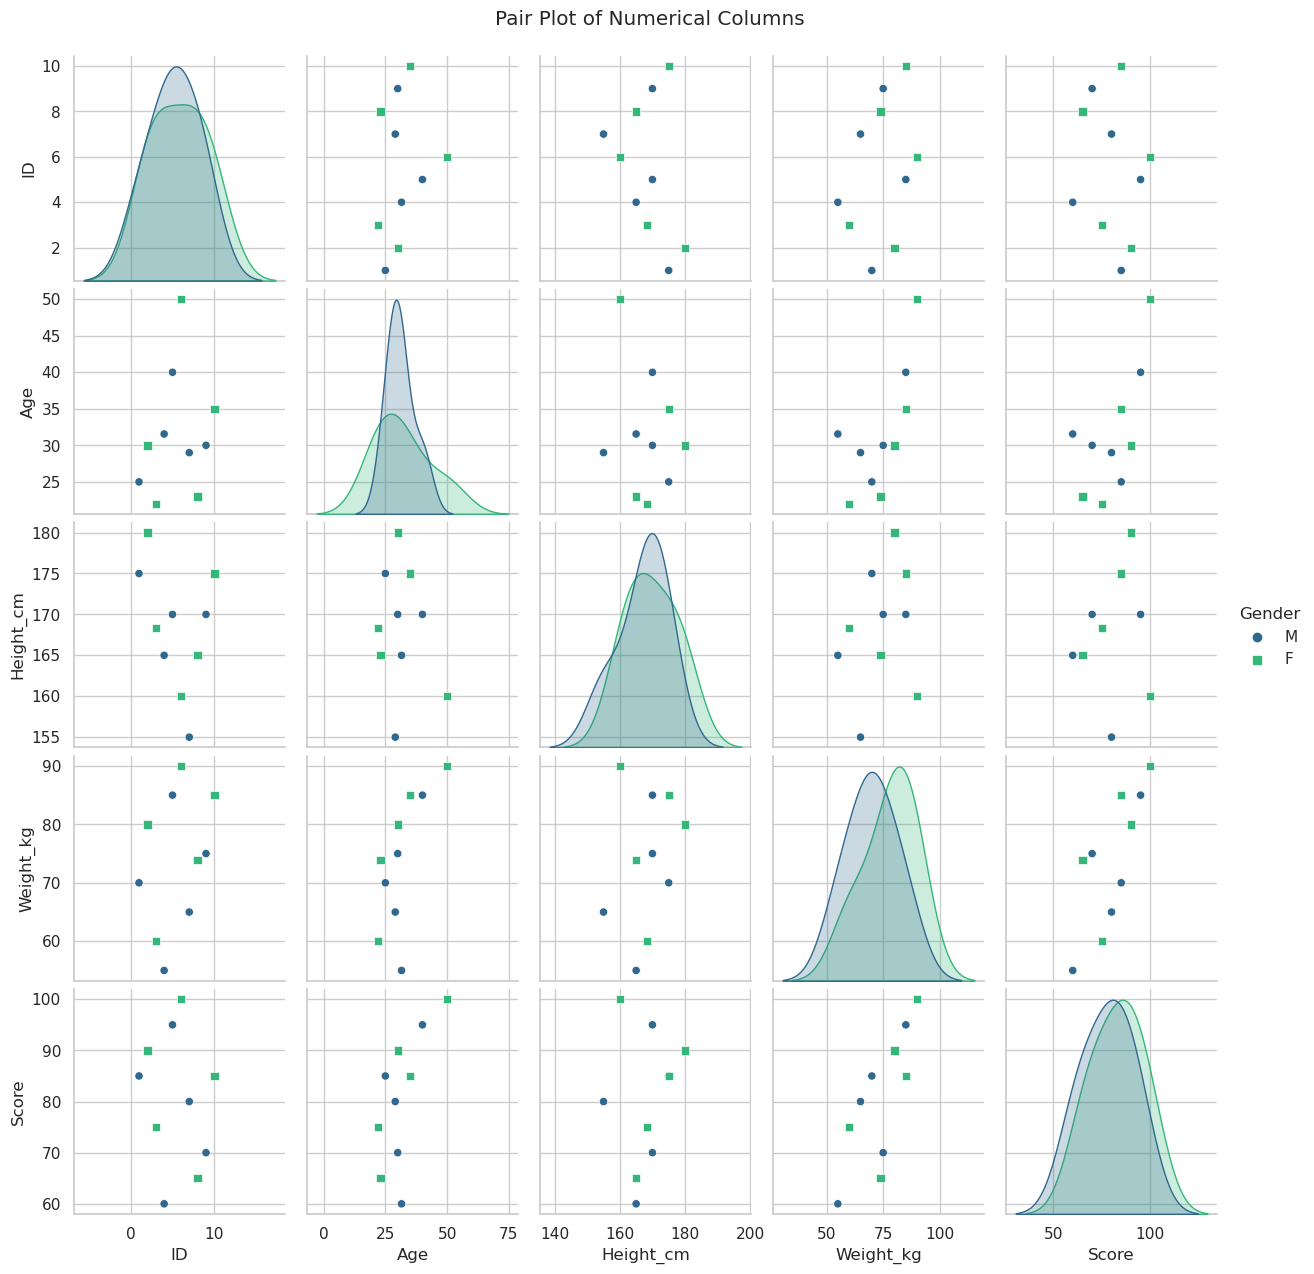

In [35]:
# Pair plot for numerical data
sns.pairplot(df, hue='Gender', palette='viridis', markers=["o", "s"])
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()


## Regression

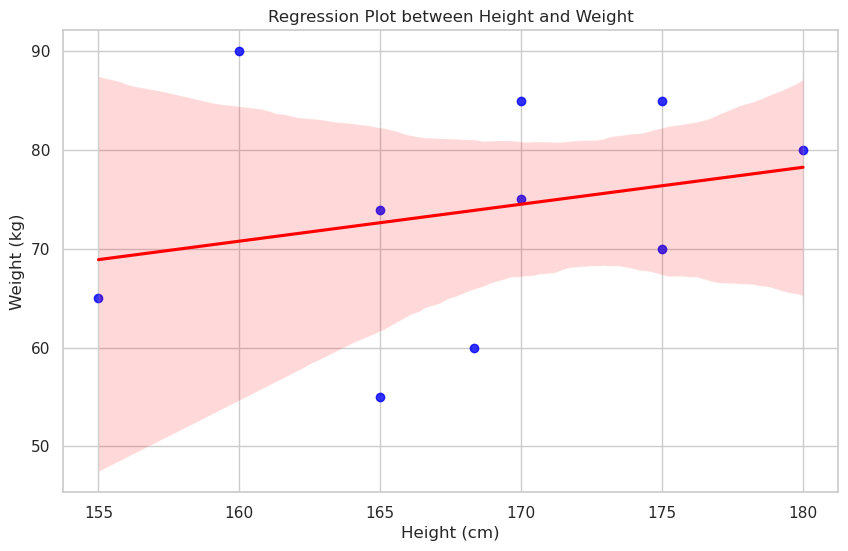

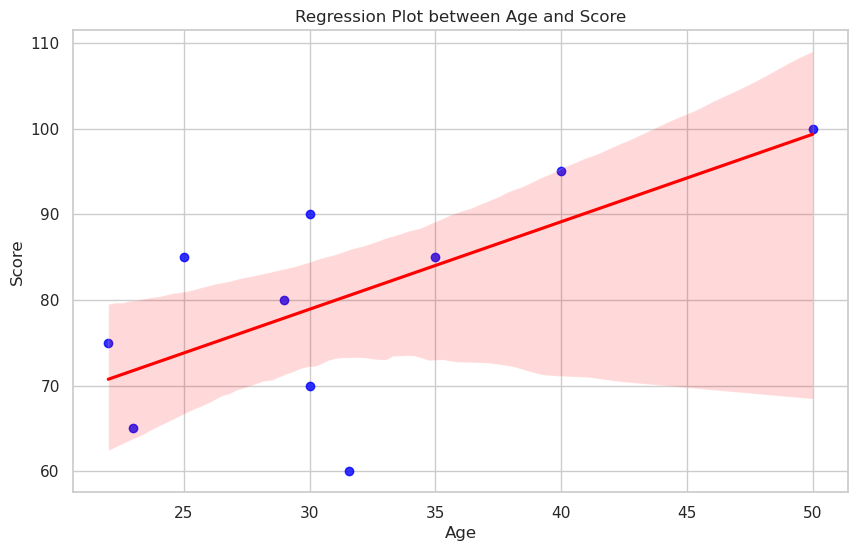

In [37]:
# Regression plot between Height and Weight
plt.figure(figsize=(10, 6))
sns.regplot(x='Height_cm', y='Weight_kg', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Regression Plot between Height and Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

# Regression plot between Age and Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Score', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Regression Plot between Age and Score")
plt.xlabel("Age")
plt.ylabel("Score")
plt.show()


In [38]:
# Generate a randomized dataset with similar structure
random_data = {
    'ID': range(1, 11),
    'Age': np.random.randint(18, 70, size=10),
    'Height_cm': np.random.randint(150, 200, size=10),
    'Weight_kg': np.random.randint(50, 100, size=10),
    'Gender': np.random.choice(['M', 'F'], size=10),
    'Score': np.random.randint(50, 100, size=10)
}

df_random = pd.DataFrame(random_data)

Age - KS Statistic: 0.6000, P-Value: 0.0524
Height_cm - KS Statistic: 0.3000, P-Value: 0.7869
Weight_kg - KS Statistic: 0.2000, P-Value: 0.9945
Score - KS Statistic: 0.4000, P-Value: 0.4175


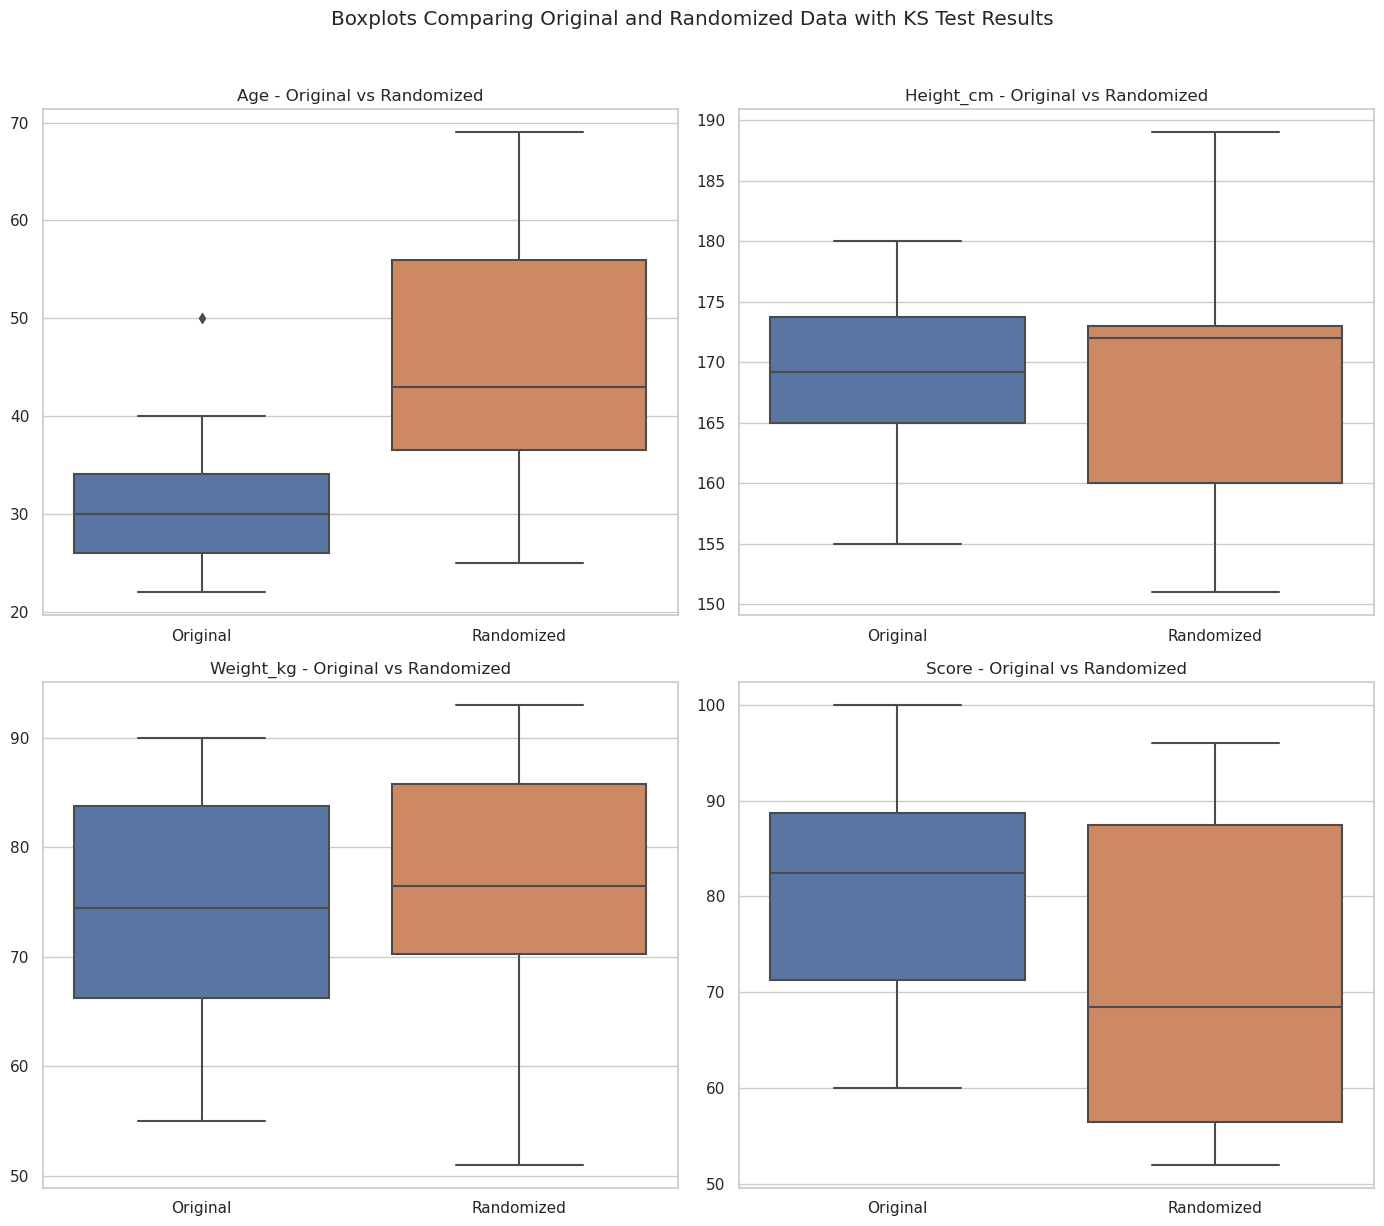

In [41]:
from scipy.stats import ks_2samp
# Merging the original and randomized data for comparison
df_combined = df.merge(df_random, on='ID', suffixes=('_original', '_randomized'))

# Kolmogorov-Smirnov Test results
ks_results = {}
columns_to_test = ['Age', 'Height_cm', 'Weight_kg', 'Score']

for col in columns_to_test:
    original = df_combined[f'{col}_original'].dropna()
    randomized = df_combined[f'{col}_randomized'].dropna()
    ks_stat, ks_p_value = ks_2samp(original, randomized)
    ks_results[col] = (ks_stat, ks_p_value)

# Print Kolmogorov-Smirnov Test results
for col, (ks_stat, ks_p_value) in ks_results.items():
    print(f"{col} - KS Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")

# Plotting the combined data with boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, col in enumerate(columns_to_test):
    ax = axes[i // 2, i % 2]
    sns.boxplot(data=[df_combined[f'{col}_original'], df_combined[f'{col}_randomized']], ax=ax)
    ax.set_xticklabels(['Original', 'Randomized'])
    ax.set_title(f'{col} - Original vs Randomized')

plt.suptitle("Boxplots Comparing Original and Randomized Data with KS Test Results", y=1.02)
plt.tight_layout()

# Show the combined plot
plt.show()